In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('/content/drive/MyDrive/weather-automated-sensors-dataset.csv')


In [4]:
print("\nSample Dataset:\n")
data.head()


Sample Dataset:



,Station Name,Measurement Timestamp,Air Temperature,Wet Bulb Temperature,Humidity,Rain Intensity,Interval Rain,Total Rain,Precipitation Type,Wind Direction,Wind Speed,Maximum Wind Speed,Barometric Pressure,Solar Radiation,Heading,Battery Life,Measurement Timestamp Label,Measurement ID
0,Oak Street Weather Station,05/22/2015 03:00:00 PM,NaN,7.0,55.0,0.0,0.0,1.4,0.0,63.0,1.9,2.8,NaN,780.0,322.0,12.0,05/22/2015 3:00 PM,OakStreetWeatherStation201505221500
1,Oak Street Weather Station,05/22/2015 05:00:00 PM,NaN,6.3,56.0,0.0,0.0,1.4,0.0,124.0,1.5,2.3,NaN,180.0,322.0,12.1,05/22/2015 5:00 PM,OakStreetWeatherStation201505221700
2,Oak Street Weather Station,05/22/2015 06:00:00 PM,NaN,6.5,54.0,0.0,0.0,1.4,0.0,156.0,1.9,3.4,NaN,127.0,322.0,12.1,05/22/2015 6:00 PM,OakStreetWeatherStation201505221800
3,Oak Street Weather Station,05/22/2015 07:00:00 PM,NaN,6.3,53.0,0.0,0.0,1.4,0.0,150.0,1.4,4.5,NaN,67.0,322.0,12.1,05/22/2015 7:00 PM,OakStreetWeatherStation201505221900
4,Oak Street Weather Station,05/22/2015 08:00:00 PM,NaN,6.4,52.0,0.0,0.0,1.4,0.0,155.0,1.1,2.3,NaN,10.0,322.0,12.0,05/22/2015 8:00 PM,OakStreetWeatherStation201505222000


In [5]:
print("Data Shape:", data.shape)


Data Shape: (59144, 18)


In [6]:
print("\nDataset Head:\n", data.head())



Dataset Head:
                  Station Name   Measurement Timestamp  Air Temperature  \
0  Oak Street Weather Station  05/22/2015 03:00:00 PM              NaN   
1  Oak Street Weather Station  05/22/2015 05:00:00 PM              NaN   
2  Oak Street Weather Station  05/22/2015 06:00:00 PM              NaN   
3  Oak Street Weather Station  05/22/2015 07:00:00 PM              NaN   
4  Oak Street Weather Station  05/22/2015 08:00:00 PM              NaN   

   Wet Bulb Temperature  Humidity  Rain Intensity  Interval Rain  Total Rain  \
0                   7.0      55.0             0.0            0.0         1.4   
1                   6.3      56.0             0.0            0.0         1.4   
2                   6.5      54.0             0.0            0.0         1.4   
3                   6.3      53.0             0.0            0.0         1.4   
4                   6.4      52.0             0.0            0.0         1.4   

   Precipitation Type  Wind Direction  Wind Speed  Maximum

In [7]:
print("\nData Description:\n", data.describe())



Data Description:
        Air Temperature  Wet Bulb Temperature      Humidity  Rain Intensity  \
count     59066.000000          38843.000000  59141.000000    38843.000000   
mean         13.282062             10.643001     69.464517        0.187591   
std           9.945331              8.965170     15.714691        1.962149   
min         -19.890000            -20.100000     17.000000        0.000000   
25%           5.500000              4.000000     59.000000        0.000000   
50%          14.900000             12.100000     71.000000        0.000000   
75%          21.500000             18.100000     82.000000        0.000000   
max          34.100000             28.400000    100.000000      183.600000   

       Interval Rain    Total Rain  Precipitation Type  Wind Direction  \
count   59141.000000  38843.000000        38843.000000    59141.000000   
mean        0.175327    185.445529            4.651932      178.980132   
std         1.300946    231.579782           16.168542 

In [8]:
print("\nData Information:\n")
data.info()


Data Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59144 entries, 0 to 59143
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Station Name                 59144 non-null  object 
 1   Measurement Timestamp        59141 non-null  object 
 2   Air Temperature              59066 non-null  float64
 3   Wet Bulb Temperature         38843 non-null  float64
 4   Humidity                     59141 non-null  float64
 5   Rain Intensity               38843 non-null  float64
 6   Interval Rain                59141 non-null  float64
 7   Total Rain                   38843 non-null  float64
 8   Precipitation Type           38843 non-null  float64
 9   Wind Direction               59141 non-null  float64
 10  Wind Speed                   59141 non-null  float64
 11  Maximum Wind Speed           59141 non-null  float64
 12  Barometric Pressure          58995 non-null  float64
 

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

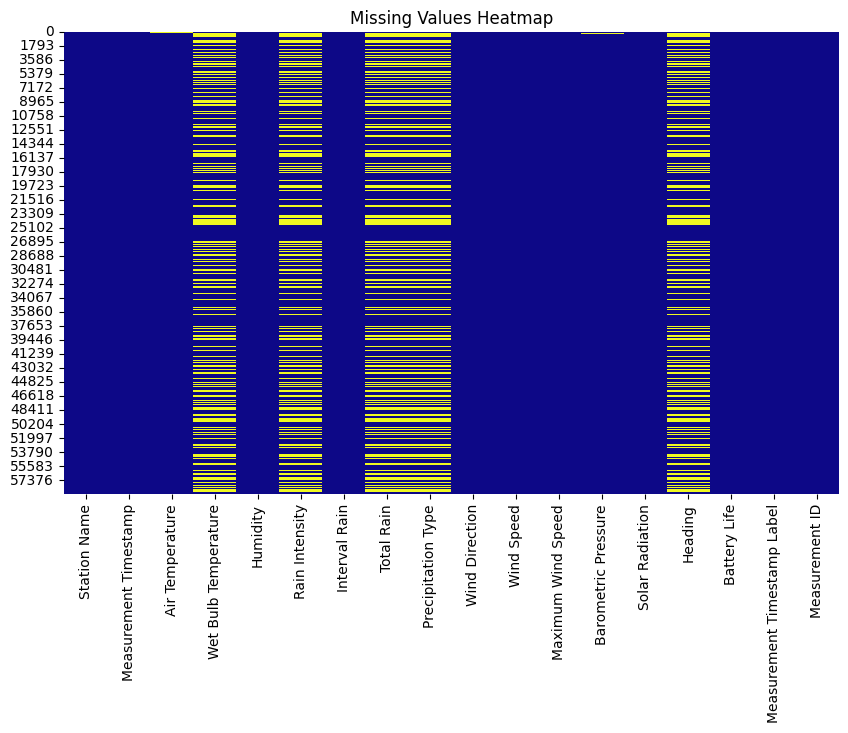

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='plasma')
plt.title("Missing Values Heatmap")
plt.show()

In [11]:
data.dropna(inplace=True)


In [12]:
numeric_data = data.select_dtypes(include=[np.number])


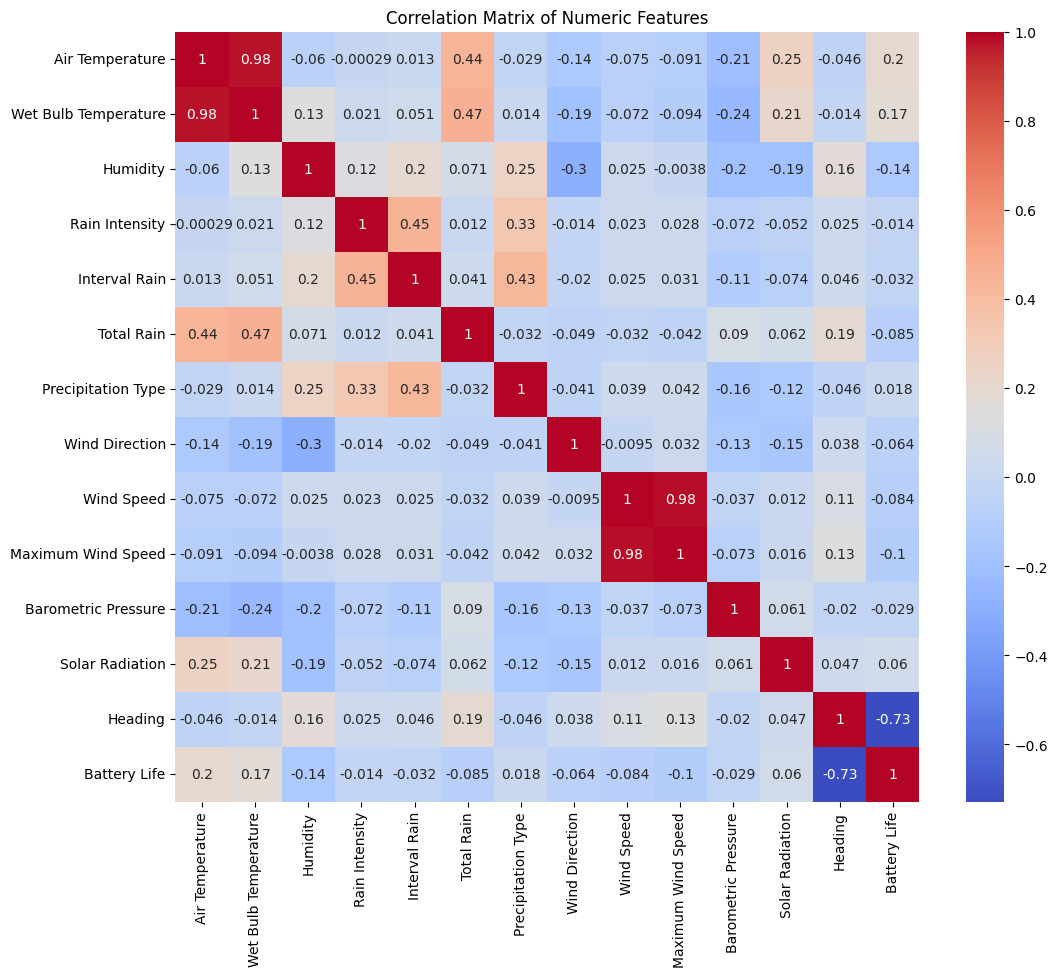

In [13]:
plt.figure(figsize=(12, 10))
correlation = numeric_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [14]:
features = data.drop(columns=['Station Name', 'Measurement Timestamp', 'Measurement Timestamp Label', 'Measurement ID', 'Air Temperature'])
target = data['Air Temperature']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,explained_variance_score,mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, LSTM, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [16]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))


In [19]:
model = Sequential()


In [20]:
#Adding CNN layers
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
#Adding LSTM layers
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(30, return_sequences=False))
model.add(Dropout(0.2))

In [22]:
# Adding Dense Layers for Prediction
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

In [23]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])


In [24]:
history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test))


Epoch 1/100
970/970 ━━━━━━━━━━━━━━━━━━━━ 28s 21ms/step - loss: 60.3289 - mae: 5.1551 - val_loss: 1.1247 - val_mae: 0.7373
Epoch 2/100
970/970 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - loss: 4.7556 - mae: 1.6822 - val_loss: 3.9742 - val_mae: 1.5127
Epoch 3/100
970/970 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - loss: 3.3103 - mae: 1.3975 - val_loss: 1.5739 - val_mae: 1.0066
Epoch 4/100
970/970 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - loss: 2.6611 - mae: 1.2430 - val_loss: 3.9303 - val_mae: 1.6700
Epoch 5/100
970/970 ━━━━━━━━━━━━━━━━━━━━ 28s 29ms/step - loss: 2.3564 - mae: 1.1798 - val_loss: 4.0013 - val_mae: 1.4533
Epoch 6/100
970/970 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - loss: 2.1387 - mae: 1.1189 - val_loss: 1.5051 - val_mae: 0.9216
Epoch 7/100
970/970 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - loss: 1.8136 - mae: 1.0303 - val_loss: 2.5101 - val_mae: 1.1630
Epoch 8/100
970/970 ━━━━━━━━━━━━━━━━━━━━ 46s 28ms/step - loss: 1.8159 - mae: 1.0051 - val_loss: 2.8765 - val_mae: 1.3033
Epoch 9/100
970/970 ━━━━━━━━━━━

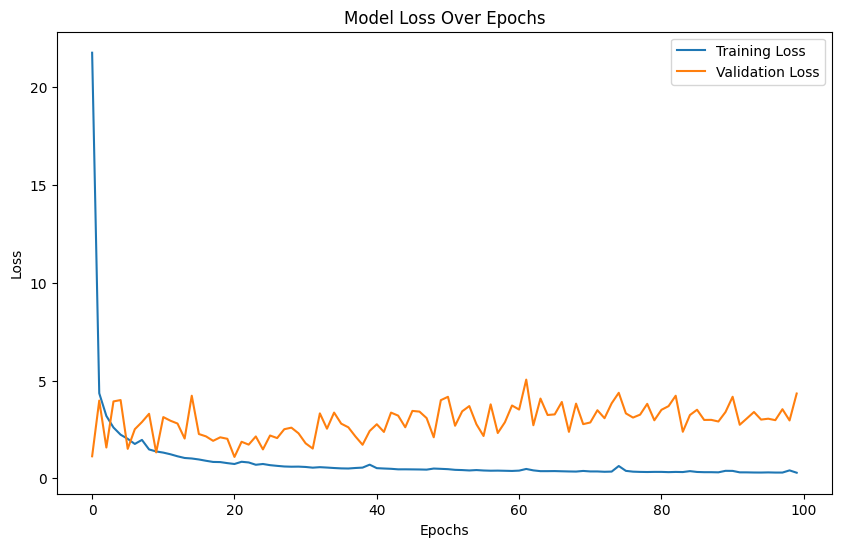

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [26]:
y_pred = model.predict(X_test_reshaped)


243/243 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [28]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nEvaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
print(f"Explained Variance Score: {explained_variance:.4f}")


Evaluation Metrics:
Mean Squared Error (MSE): 4.3347
R^2 Score: 0.9565
Root Mean Squared Error (RMSE): 2.0820
Mean Absolute Error (MAE): 1.6915
Mean Absolute Percentage Error (MAPE): 9112251829514.7383
Explained Variance Score: 0.9646


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


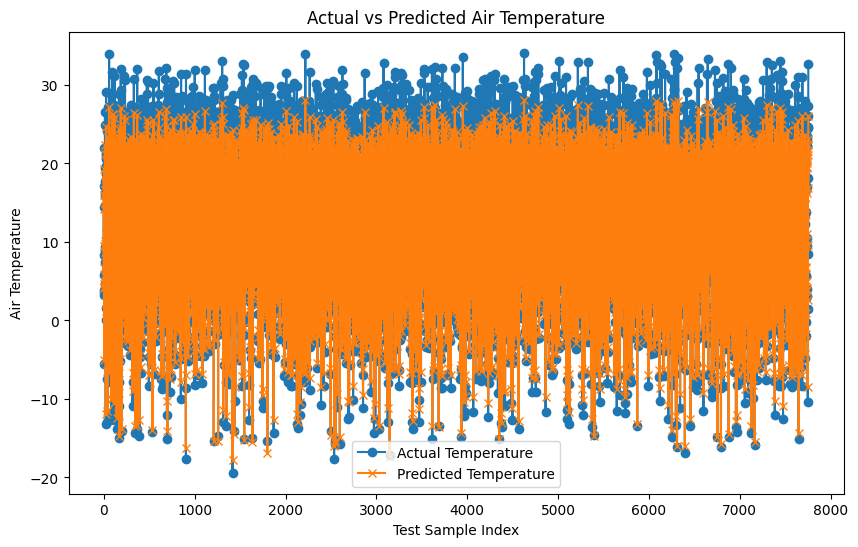

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Temperature', marker='o')
plt.plot(y_pred, label='Predicted Temperature', marker='x')
plt.title("Actual vs Predicted Air Temperature")
plt.xlabel("Test Sample Index")
plt.ylabel("Air Temperature")
plt.legend()
plt.show()


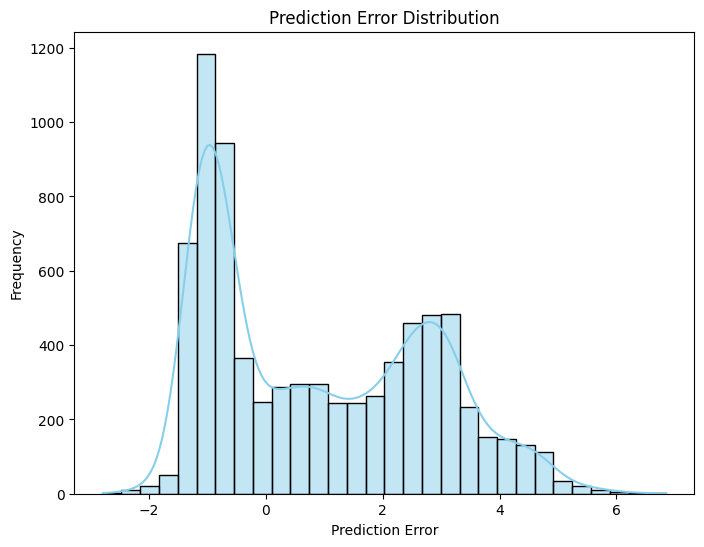

In [30]:
plt.figure(figsize=(8, 6))
sns.histplot(y_test - y_pred.flatten(), kde=True, color="skyblue", bins=30)
plt.title("Prediction Error Distribution")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.show()

In [31]:
tolerance = 1.0
accurate_predictions = np.abs(y_test.values - y_pred.flatten()) <= tolerance
accuracy_within_tolerance = np.mean(accurate_predictions) * 100

print(f"\nPrediction Accuracy (within ±{tolerance}°): {accuracy_within_tolerance:.2f}%")


Prediction Accuracy (within ±1.0°): 36.29%


In [32]:
print("Column Names in Dataset:", data.columns)

Column Names in Dataset: Index(['Station Name', 'Measurement Timestamp', 'Air Temperature',
       'Wet Bulb Temperature', 'Humidity', 'Rain Intensity', 'Interval Rain',
       'Total Rain', 'Precipitation Type', 'Wind Direction', 'Wind Speed',
       'Maximum Wind Speed', 'Barometric Pressure', 'Solar Radiation',
       'Heading', 'Battery Life', 'Measurement Timestamp Label',
       'Measurement ID'],
      dtype='object')


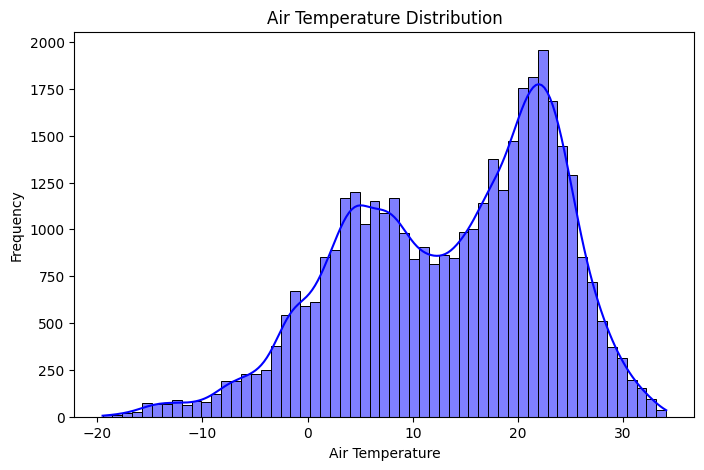

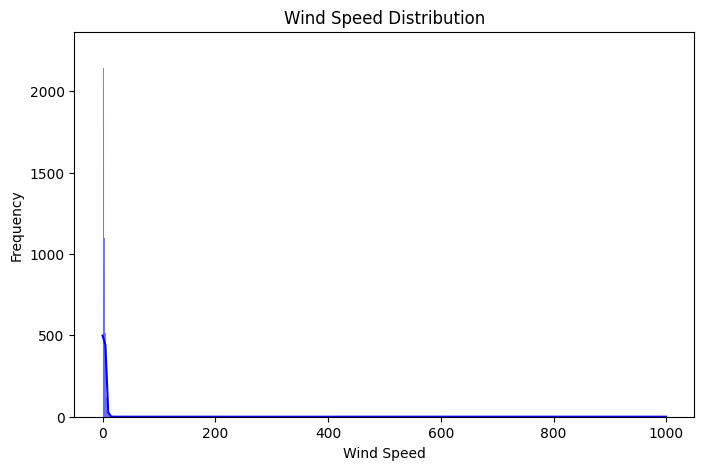

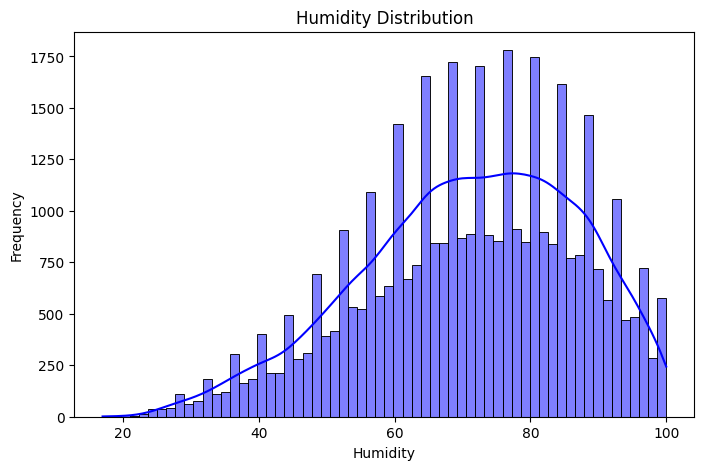

In [33]:
selected_features = ['Air Temperature', 'Wind Speed', 'Humidity']
for feature in selected_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[feature], kde=True, color='blue')
    plt.title(f"{feature} Distribution")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()


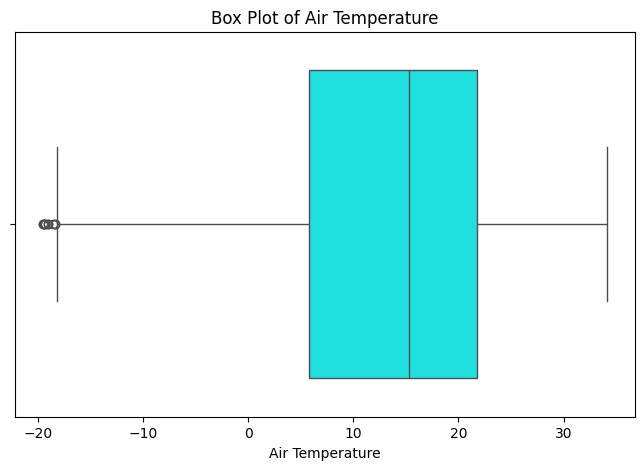

In [34]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=target, color="cyan")
plt.title("Box Plot of Air Temperature")
plt.xlabel("Air Temperature")
plt.show()

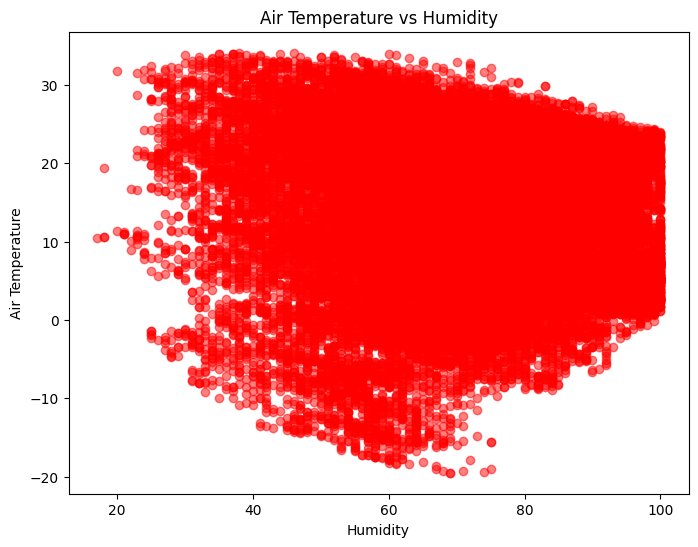

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Humidity'], target, alpha=0.5, c='red')
plt.title("Air Temperature vs Humidity")
plt.xlabel("Humidity")
plt.ylabel("Air Temperature")
plt.show()

In [36]:
from sklearn.ensemble import RandomForestRegressor


In [37]:
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
importance = forest.feature_importances_

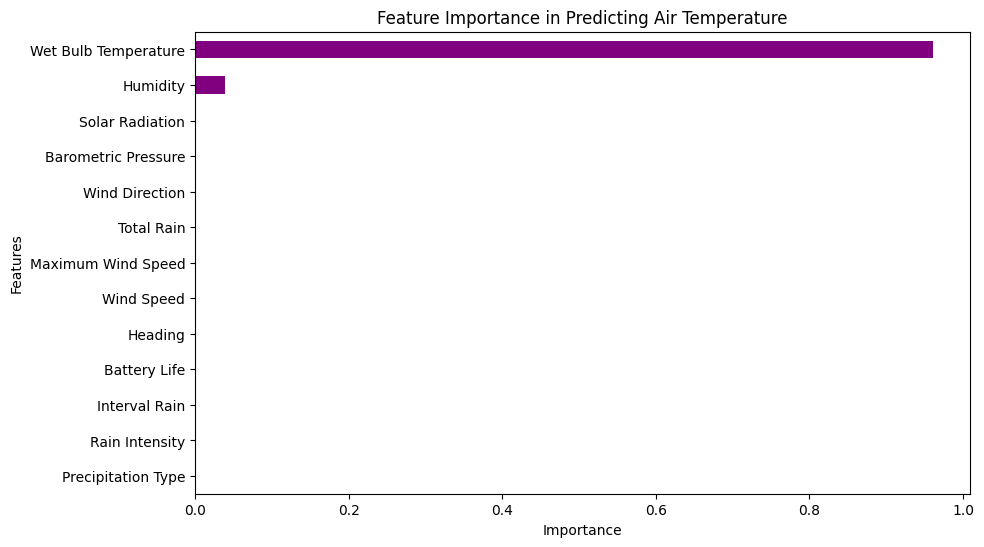

In [38]:
feature_importance = pd.Series(importance, index=features.columns)
plt.figure(figsize=(10, 6))
feature_importance.sort_values().plot(kind='barh', color='purple')
plt.title("Feature Importance in Predicting Air Temperature")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [39]:
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
print(f"Explained Variance Score: {explained_variance:.4f}")
print(f"Prediction Accuracy within ±{tolerance}° tolerance: {accuracy_within_tolerance:.2f}%")

Mean Squared Error (MSE): 4.3347
R^2 Score: 0.9565
Root Mean Squared Error (RMSE): 2.0820
Mean Absolute Error (MAE): 1.6915
Mean Absolute Percentage Error (MAPE): 9112251829514.7383
Explained Variance Score: 0.9646
Prediction Accuracy within ±1.0° tolerance: 36.29%
